# Weight Loss Diet, A Case Study


## Imported Libraries

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import scipy
import warnings
import matplotlib.pyplot as plt
import numpy as np 
from scipy.stats import t
from scipy.stats import norm
import math
import seaborn as sns

## The DataSets

In [4]:
#Before Weight
xi = [103.68,110.68,119.05,101.75,91.69,112.03,88.84,105.18,110.37,120.99]
x1 = pd.Series(xi)

In [5]:
#After Weight
xj = [92.87,101.58,105.66,96.18,86.97,105.90,80.56,97.00,99.27,107.44]
x2 = pd.Series(xj)

## DataSet Overview

In [16]:
print(x1.describe() , "\n",x2.describe())


count     10.000000
mean     106.426000
std       10.508764
min       88.840000
25%      102.232500
50%      107.775000
75%      111.692500
max      120.990000
dtype: float64 
 count     10.00000
mean      97.34300
std        8.67151
min       80.56000
25%       93.69750
50%       98.13500
75%      104.64000
max      107.44000
dtype: float64


In [7]:
print("Mean and std of Before Weight Loss:",x1.mean(), x1.std())
print("Mean and std of After Weight Loss:",x2.mean(), x2.std())

s1 = x1.std()
s2 = x2.std()


Mean and std of Before Weight Loss: 106.426 10.508763750106647
Mean and std of After Weight Loss: 97.343 8.671510249085795


[Text(1, 0, 'Weight Before'), Text(2, 0, 'Weight After')]

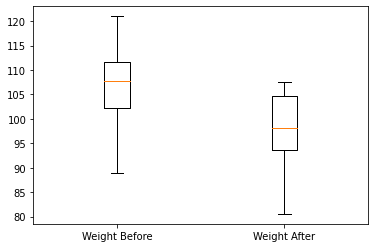

In [8]:
# Distribution overiew of the given sample
my_dict = {'Weight Before': xi, 'Weight After':xj}

fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())

In [64]:
standarddev = math.sqrt(((10 - 1)*s1 * s1 + (10-1)*s2 * s2) / (10 + 10-2))
standarddev

9.634033567399367

## Appropriate Statistic to use i.e T-Statistic 

In [68]:
# To find the T critical value
t = stats.t.ppf(q=1-.05/2,df=18)
t

2.10092204024096

So, the 95% confidence interval for the difference is (18.127 ,0.038)

In [75]:

n1 = len(xi)
n2 = len(xj)

print ((x1.mean() - x2.mean()) + 2.10*(9.63)*math.sqrt((1/n1) + (1/n2)))
print ((x1.mean() - x2.mean()) - t*(9.63)*math.sqrt((1/n1) + (1/n2)))


18.12700054179565
0.03502853799539629
9.04400054179565


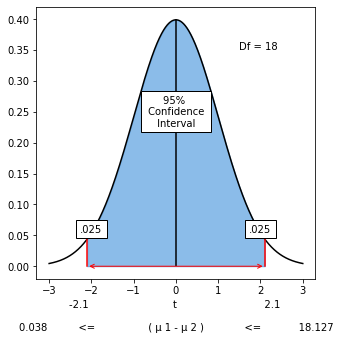

In [70]:
x_min = -3
x_max = 3
plt.figure(figsize=(5,5))
mean = 0
std = 1

x = np.linspace(x_min, x_max, 1000)

y = scipy.stats.norm.pdf(x,mean,std)

plt.plot(x,y, color='black')

pt1 = -2.1
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='red')

pt2 = 2.1
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='red')
plt.xlabel("-2.1                           t                            2.1 \n \n0.038          <=                 ( \u03BC 1 - \u03BC 2 )             <=            18.127")
plt.vlines(x = 0, ymin = 0, ymax = 0.40,
           colors = 'black',
           label = 'vline_multiple - full height')
plt.text(0, 0.25, '95% \n Confidence \n Interval ', ha='center', va='center',rotation='horizontal', bbox={'facecolor':'white'})
plt.text(-2, 0.06, '.025', ha='center', va='center',rotation='horizontal', bbox={'facecolor':'white'})
plt.text(2, 0.06, '.025', ha='center', va='center',rotation='horizontal', bbox={'facecolor':'white'})

ptx = np.linspace(pt1, pt2, 1000)
pty = scipy.stats.norm.pdf(ptx,mean,std)
plt.annotate('', xy=(-2.1, 0.0), xytext=(2.1, 0.0),
            arrowprops=dict(arrowstyle='<->', color='red'))


plt.fill_between(ptx, pty, color='#187ad4', alpha=0.5)
plt.text(1.5,0.35, "Df = 18")

plt.show()


The researcher is 95% confident that the difference in population average of weights before and weights after is between 0.038 and 18.127.
The point estimate for the difference in population means is 9.08 with the error of 9.044. 
Hence we are 95% confident that the population mean for weights before is more than the population mean test score for weights after by between 0.038 and 18.127.